# 1. Download and Import Data


In [1]:
import os
import sys

%cd /content

PROJECT_DIR = 'seml31_project'
REPO_URL = 'https://github.com/phamtranminhtri/SEML31.git'
REPO_BRANCH = 'additional_assignment'

if os.path.exists(PROJECT_DIR):
    print(f"Removing '{PROJECT_DIR}'...")
    !rm -rf {PROJECT_DIR}

print(f"Creating '{PROJECT_DIR}'...")
!mkdir {PROJECT_DIR}
%cd {PROJECT_DIR}

print(f"Cloning...")
!git init -q
!git remote add origin {REPO_URL}
!git config core.sparsecheckout true

!echo "modules/" >> .git/info/sparse-checkout
!echo "datasets/lab_and_musics/" >> .git/info/sparse-checkout
!git pull origin {REPO_BRANCH} -q

DATA_TARGET_DIR = 'dataset'
!mkdir -p {DATA_TARGET_DIR}
!mv datasets/lab_and_musics {DATA_TARGET_DIR}/

!rm -rf datasets

modules_path = os.path.abspath('modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)

utils_path = os.path.abspath('modules/utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

print(f"\n--- Setup Complete ---")
!ls -R


/content
Creating 'seml31_project'...
/content/seml31_project
Cloning...
Updating files: 100% (107/107), done.

--- Setup Complete ---
.:
dataset  modules

./dataset:
lab_and_musics

./dataset/lab_and_musics:
 Across_the_Universe.lab       Let_It_Be.lab
 Across_the_Universe.mp3       Let_It_Be.mp3
 A_Day_In_The_Life.lab	       Love_Me_Do.lab
 A_Day_In_The_Life.mp3	       Love_Me_Do.mp3
"A_Hard_Day's_Night.lab"       Lucy_In_The_Sky_With_Diamonds.lab
"A_Hard_Day's_Night.mp3"       Lucy_In_The_Sky_With_Diamonds.mp3
 All_My_Loving.lab	       Magical_Mystery_Tour.lab
 All_My_Loving.mp3	       Magical_Mystery_Tour.mp3
 All_You_Need_Is_Love.lab      Michelle.lab
 All_You_Need_Is_Love.mp3      Michelle.mp3
 And_I_Love_Her.lab	      "Octopus's_Garden.lab"
 And_I_Love_Her.mp3	      "Octopus's_Garden.mp3"
"Baby_You're_A_Rich_Man.lab"  'Oh!_Darling.lab'
"Baby_You're_A_Rich_Man.mp3"  'Oh!_Darling.mp3'
 Because.lab		       Penny_Lane.lab
 Because.mp3		       Penny_Lane.mp3
 Blue_Jay_Way.lab	      "

In [2]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import glob
import pandas as pd
import pytest
import re

import eda
import evaluation
import feature_extraction
import hmm
import preprocessing
import training


# 2. EDA (Exploratory Data Analysis)


In [3]:
print("\nSummarizing dataset...")
dataset_dir = 'dataset/lab_and_musics'
lab_files, audio_files = eda.summarize_dataset(dataset_dir)


Summarizing dataset...
--- Dataset Directory Analysis ---
Path: dataset/lab_and_musics
Number of '.lab' files: 50
Number of audio files: 50


In [4]:
sample_lab_file = lab_files[0]
df_lab = eda.load_and_preview_lab(sample_lab_file, num_rows=10)

--- File Preview: A_Day_In_The_Life.lab ---
Total chord segments: 120


,start_time,end_time,chord_label
0,0.000000,1.914761,G
1,1.914761,3.369980,B:min
2,3.369980,6.519569,E:min7
3,6.519569,12.848047,C
4,12.848047,14.425963,G
5,14.425963,15.923650,B:min/5
6,15.923650,17.490997,E:min7
7,17.490997,18.988684,E:min7/b7
8,18.988684,20.556031,C
9,20.556031,22.123378,E:min/5


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [5]:
chord_counts = eda.calculate_global_chord_counts(lab_files)

total_segments = chord_counts.sum()
print(f"Total chord segments: {total_segments}")
print(f"Number of different types of chord: {len(chord_counts)}")
print(f"\nTop 20 popular types:")
print(chord_counts.head(20))

Aggregating all chords from .lab files...


Reading Lab files: 100%|██████████| 50/50 [00:00<00:00, 820.92it/s]

Total chord segments: 4529
Number of different types of chord: 231

Top 20 popular types:
G         513
A         421
D         413
C         375
F         173
E         164
N         115
B:min     104
B          98
A:min      93
D:min      89
E:min      88
Bb         70
F#:min     62
C#:min     56
D/5        55
Eb         55
G:7        53
F#         47
A:7        43
Name: count, dtype: int64


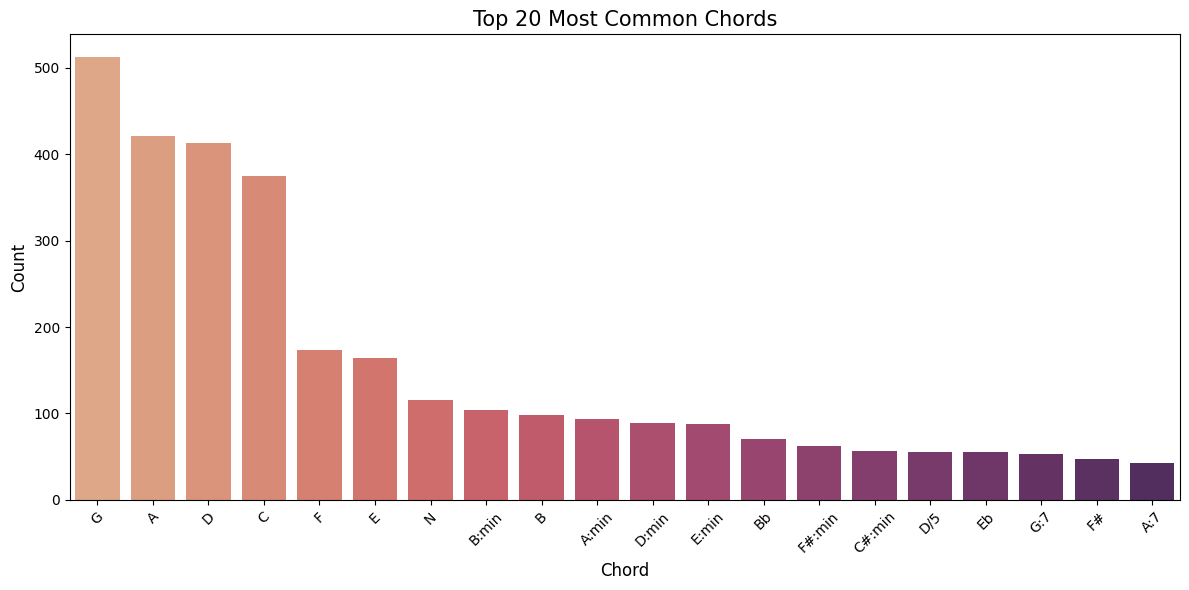

In [6]:
fig_chord_dist = eda.plot_chord_distribution(chord_counts, top_n=20)
plt.show()

--- Song Duration Analysis ---


Analyzing durations:   0%|          | 0/50 [00:00<?, ?it/s]/content/seml31_project/modules/utils/eda.py:105: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration = librosa.get_duration(filename=audio_file)
Analyzing durations: 100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Number of songs analyzed: 50
Average duration: 179.28 seconds
Shortest duration: 82.44 seconds
Longest duration: 308.30 seconds
Standard deviation: 49.52 seconds


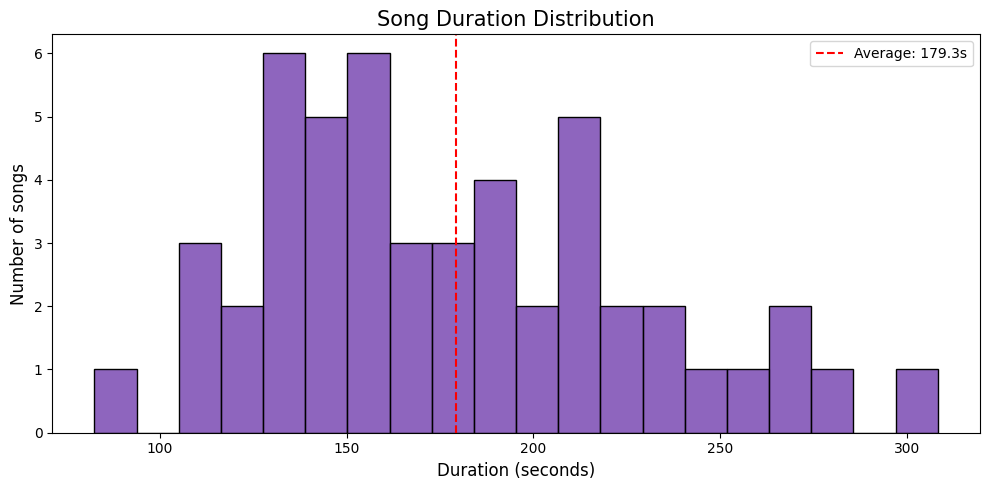

In [7]:
fig_durations = eda.analyze_and_plot_durations(audio_files)
plt.show()

--- File Visualization: A_Day_In_The_Life.mp3 ---


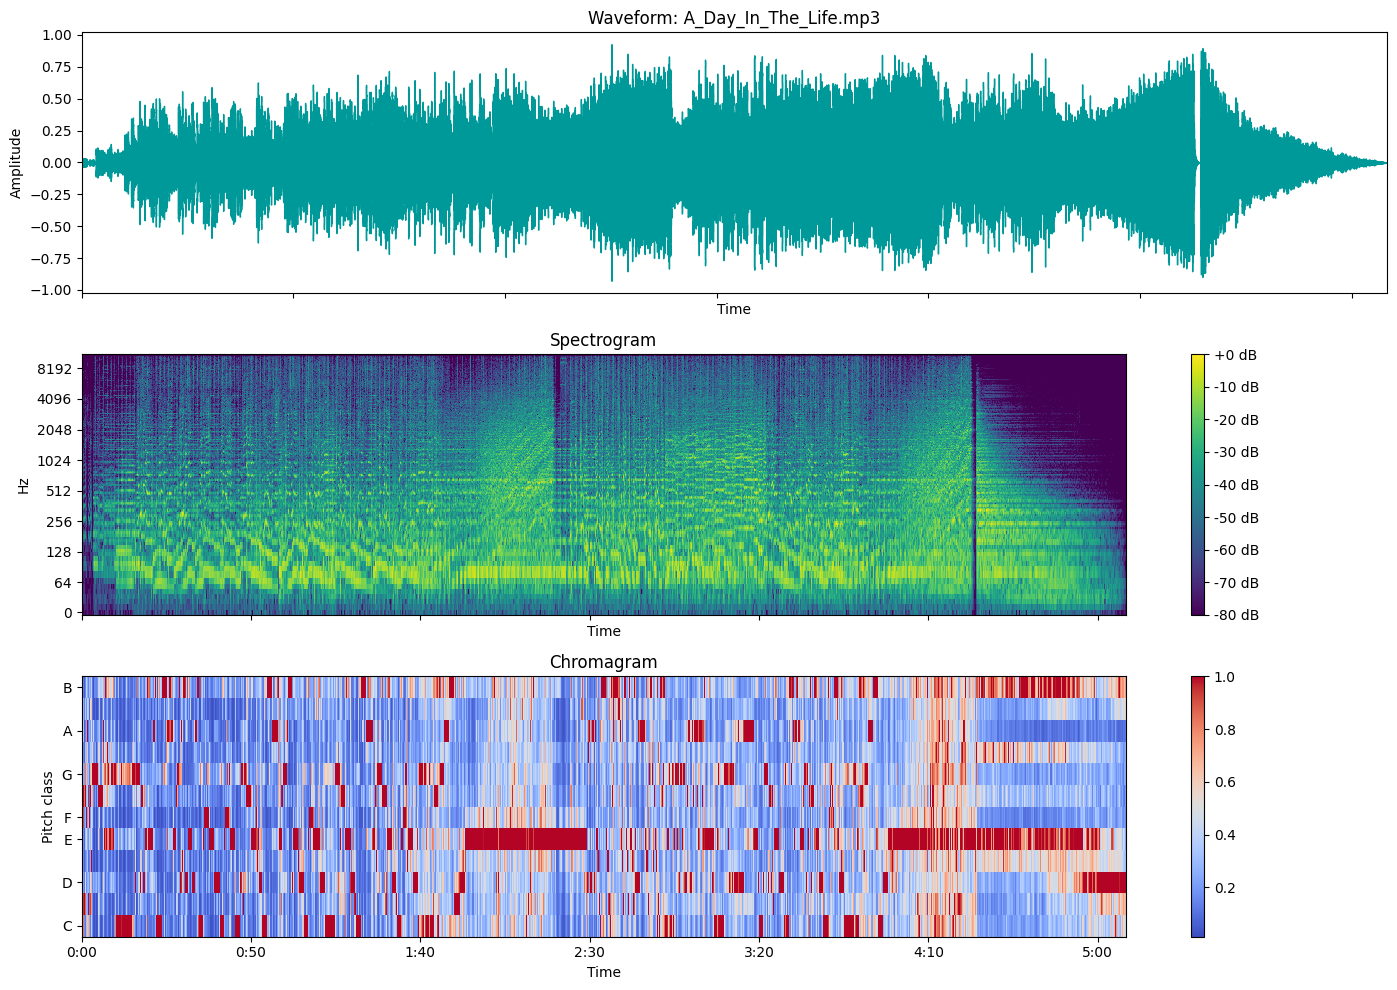

In [8]:
sample_lab = lab_files[0]
sample_audio = os.path.splitext(sample_lab)[0] + '.mp3'
fig_viz = eda.plot_audio_visualizations(sample_audio, sr=22500)
plt.show()

--- Chord Position Analysis ---


Analyzing positions: 100%|██████████| 50/50 [00:00<00:00, 107.10it/s]


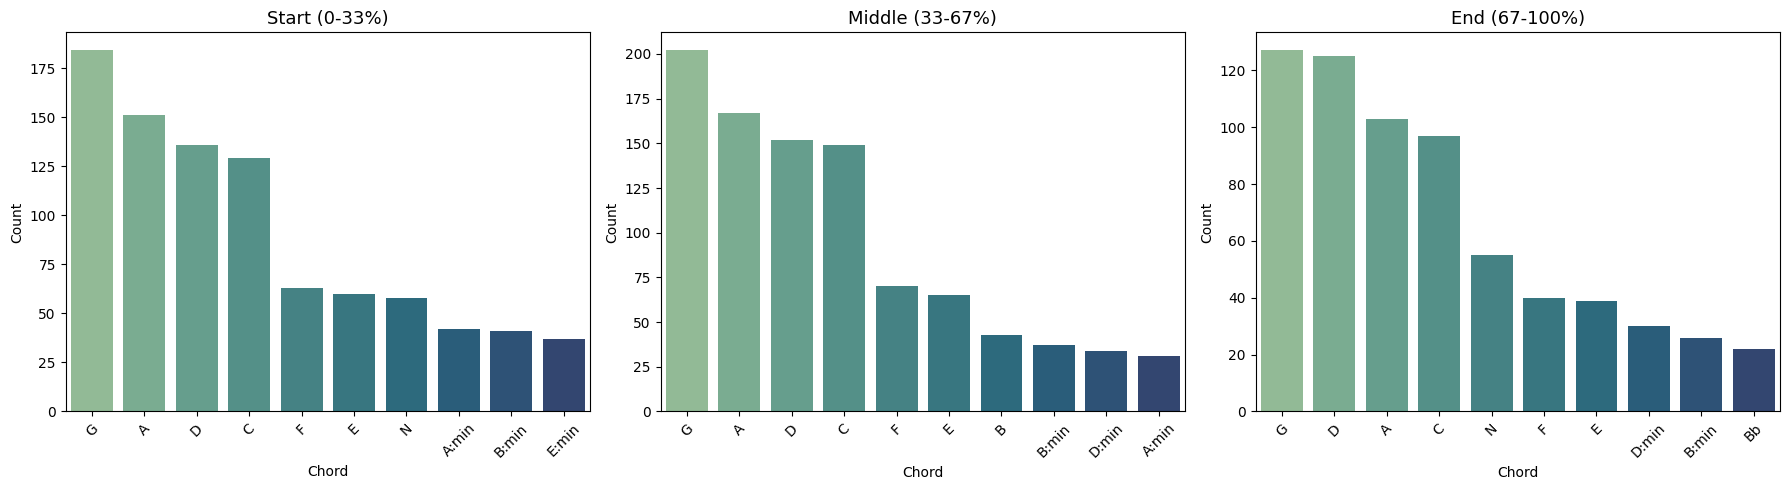

In [9]:
fig_positions = eda.analyze_and_plot_chord_positions(lab_files)
plt.show()

--- Chord Transition Analysis (Top 20) ---


Analyzing transitions: 100%|██████████| 50/50 [00:00<00:00, 99.68it/s] 


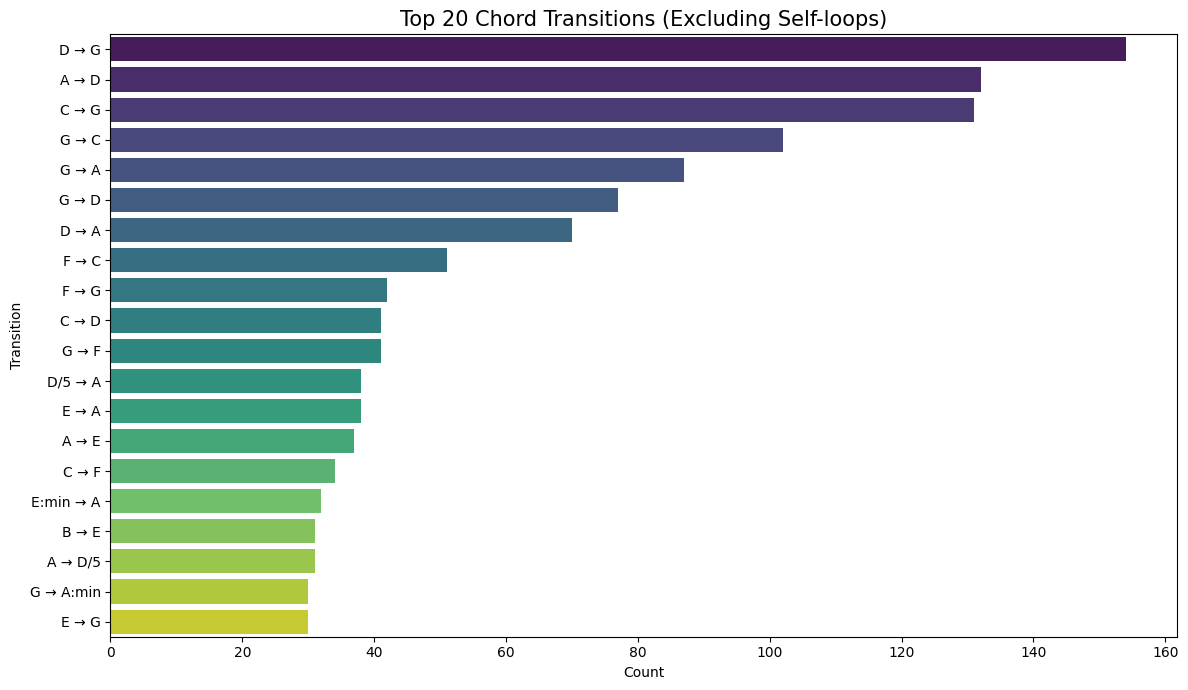

In [10]:
fig_transitions = eda.analyze_and_plot_transitions(lab_files, top_n=20)
plt.show()

#3. Preprocessing


In [11]:
import numpy as np
import re

from preprocessing import (
    split_dataset,
    simplify_chord,
    SAMPLE_RATE,
    HOP_LENGTH,
    CHORD_STATES,
    CHORD_TO_ID,
    ID_TO_CHORD
)

train_songs, test_songs = split_dataset(lab_files, n_train=40)
print(f"Total chord states: {len(CHORD_STATES)}")

Total songs: 50
Train songs: 40
Test songs: 10
Total chord states: 25


# 4. Feature Extraction


In [12]:
from scipy.ndimage import median_filter as scipy_median_filter
from feature_extraction import extract_features

In [13]:
import os
import numpy as np
import librosa
from typing import List, Tuple
from tqdm import tqdm


def load_labels(
    lab_file: str,
    n_frames: int,
    hop: int = 512,
    sr: int = 22050
) -> List[str]:

    labels: List[str] = ["N"] * n_frames

    with open(lab_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 3:
                continue

            start, end, chord_raw = float(parts[0]), float(parts[1]), parts[2]
            chord = simplify_chord(chord_raw)
            s = int(start * sr / hop)
            e = int(end * sr / hop)

            for i in range(s, min(e, n_frames)):
                labels[i] = chord

    return labels



def process_songs(
    label_list: List[str],
    name: str
) -> Tuple[List[np.ndarray], List[List[str]]]:

    features: List[np.ndarray] = []
    labels: List[List[str]] = []

    for label in tqdm(label_list, desc=f"Processing {name}", ncols=80):
        base = os.path.splitext(label)[0]
        audio = base + ".mp3"

        if not os.path.exists(audio):
            print(f"Warning: {audio} missing")
            continue

        f: np.ndarray = extract_features(audio)
        l: List[str] = load_labels(label, f.shape[0])

        features.append(f)
        labels.append(l)

    print(f"{name}: {len(features)} songs")
    return features, labels


In [14]:
X_train, y_train = process_songs(train_songs, "Train")
X_test, y_test = process_songs(test_songs, "Test")

Processing Train: 100%|█████████████████████████| 40/40 [13:16<00:00, 19.91s/it]


Train: 40 songs


Processing Test: 100%|██████████████████████████| 10/10 [03:08<00:00, 18.85s/it]

Test: 10 songs


#5. Calculate HMM Parameters
Including A, pi and GMMs as B

In [15]:
A, pi = training.calc_hmm_parameters(
    y_train,
    n_states=len(preprocessing.CHORD_STATES)
)

In [22]:
GMM_Models = training.train_GMM(
    X_train,
    y_train,
    n_states=len(preprocessing.CHORD_STATES),
    n_components=1,
    covariance_type='full'
)

Training GMMs (Emission Model 'B'): 100%|██████████| 25/25 [00:16<00:00,  1.54it/s]


#6. Evaluation Chord Recognition using Viterbi


Predicting on Test Set: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]



--- Evaluation Metrics ---
Overall Accuracy: 25.10%

--- Confusion Matrix ---


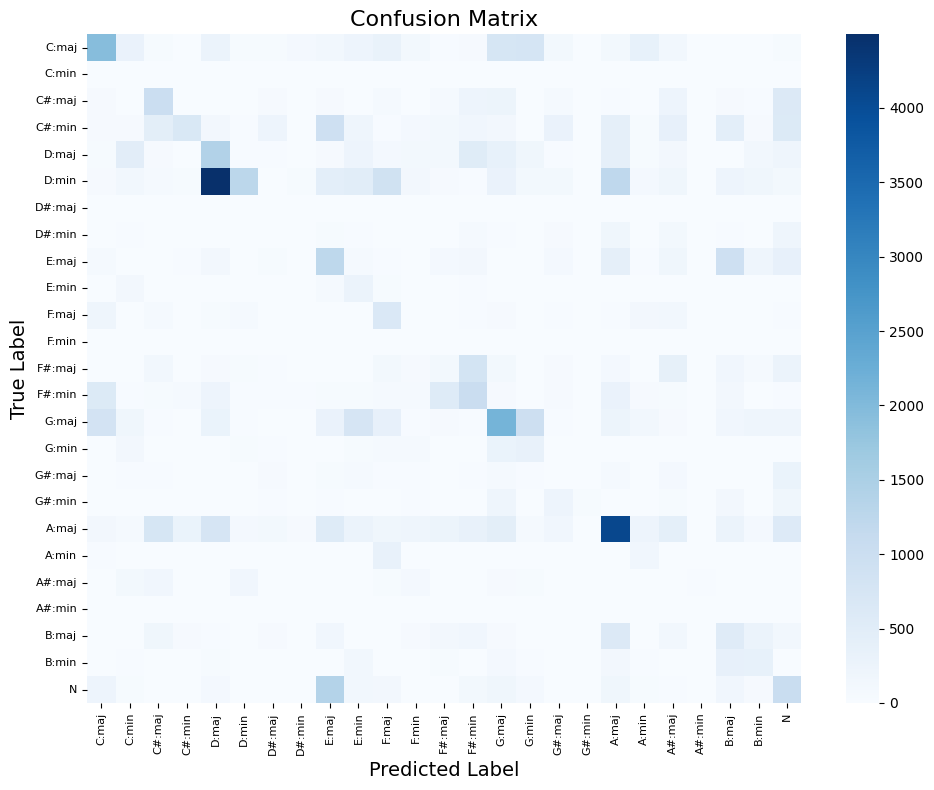

In [23]:
all_predicted_chords, all_true_labels = evaluation.predict_on_test_set(
    X_test,
    y_test,
    pi,
    A,
    GMM_Models
)

acc, y_true_flat, y_pred_flat = evaluation.calculate_accuracy(
    all_predicted_chords,
    all_true_labels
)

class_names_list = preprocessing.CHORD_STATES
fig_cm = evaluation.plot_confusion_matrix(
    y_true_flat,
    y_pred_flat,
    class_names_list
)

plt.show()